# KNN Regressor

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
from setting_features import *

In [4]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

K-nearest neighbors (KNN) is a type of **supervised** learning algorithm used for both regression and classification.

For classification and regression whe have to follow the next steps for K = 3.

### Step 1

Look the data.

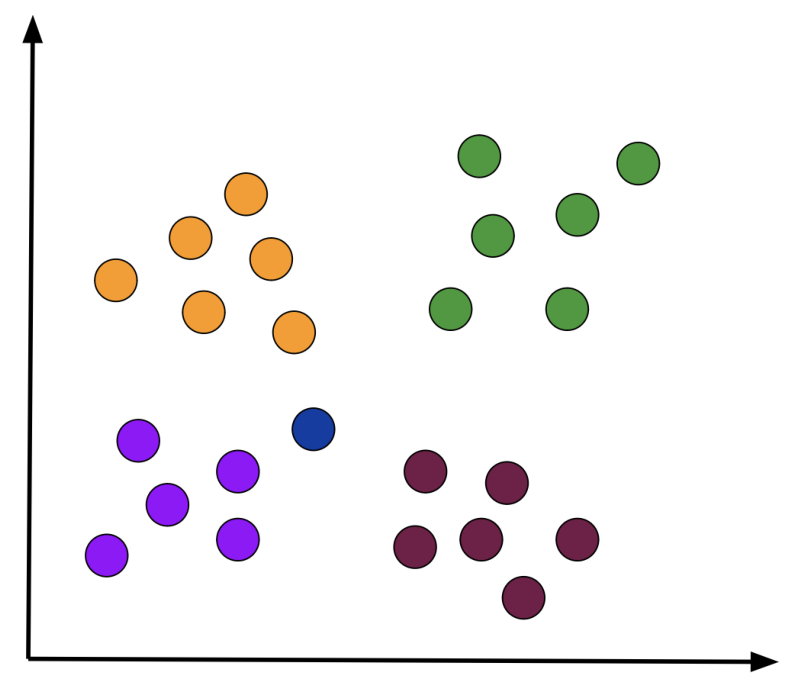

In [5]:
display_img('Step_1.png', 10, 10)

### Step 2

Determine the first neighbor.

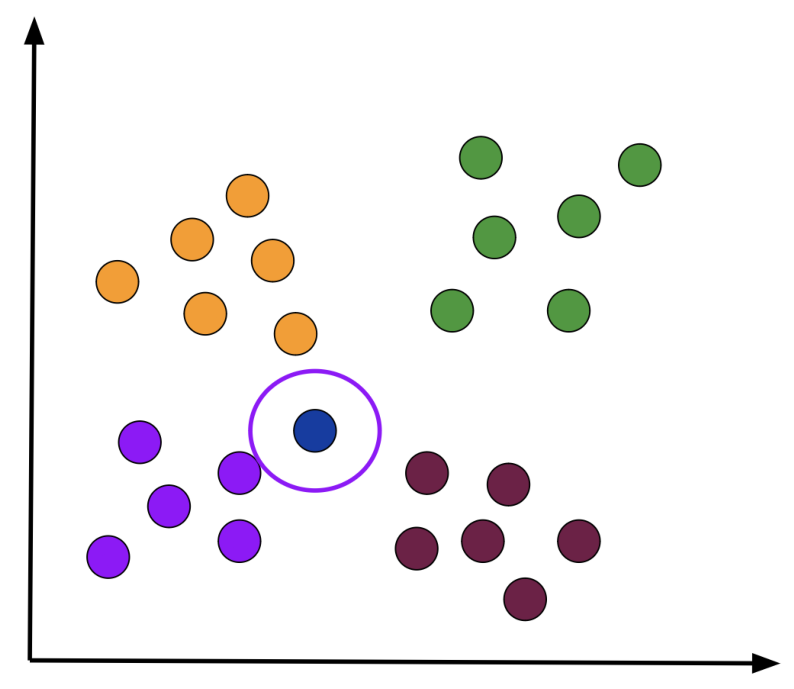

In [6]:
display_img('Step_2.png', 10, 10)

### Step 3

Determine the second neighbor.

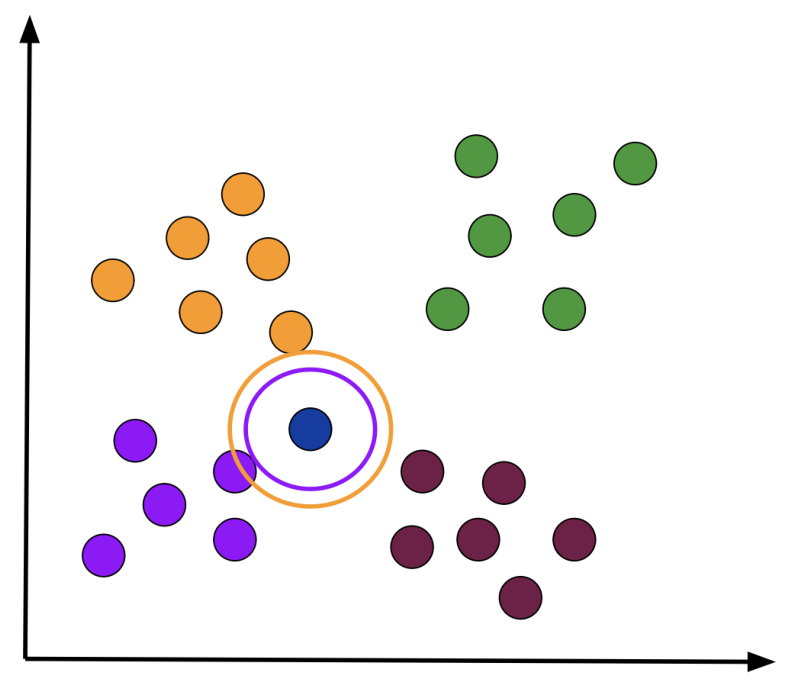

In [7]:
display_img('Step_3.png', 10, 10)

### Step 4

Determine the third neighbor.

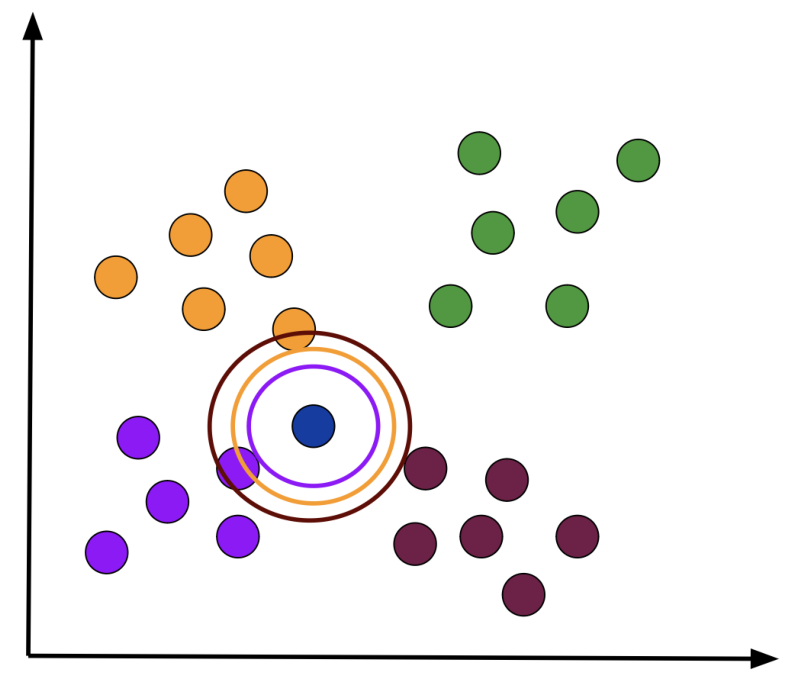

In [8]:
display_img('Step_4.png', 10, 10)

### Step 5

Consider the $K=3$ neighbors for:

* Classification: The class belongs the blue point is the majority. We can consider more importance to differents points in function its distance (for example more importance to the purple point).
* Regression: The value belongs the blue point is the average of all the points. We can consider more importance to differents points in function its distance (for example more importance to the purple point) using weighted average.

In [9]:
start = time.time()

# 1. Preprocessing

### i. Read Dataframe

In [10]:
df = pd.read_csv('Life Expectancy Data.csv')

In [11]:
X_cols = var_dict['cat_oh'] + var_dict['num_mean']
y_col = ['Life expectancy ']

### ii. Drop 'y' NaNs

In [12]:
df = df[df[y_col[0]].notna()]

### iii. Split

In [13]:
# External

ctr_test_hor_ext = ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Peru', 'Uruguay']

ctr_test_ver_ext = ['Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Venezuela (Bolivarian Republic of)']

# Internal

ctr_test_hor_int = ['Dominica', 'Mauritius', 'Netherlands', 'Armenia', 'Kazakhstan', 'Russian Federation', 'Ukraine', 'Bangladesh', 'India', 'Somalia']

ctr_test_ver_int = ['Afghanistan', 'New Zealand', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Philippines']

# Validation

ctr_val_hor = ['Albania', 'Qatar', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Poland', 'Portugal', 'Republic of Korea', 'Senegal', 'Republic of Moldova', 
               'Romania', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Morocco', 'Montenegro']

ctr_val_ver = ['Algeria', 'Luxembourg', 'Sierra Leone', 'Seychelles', 'Serbia', 'Saudi Arabia', 'Mongolia', 'Micronesia (Federated States of)', 'Mexico',
               'Mauritania', 'Malta', 'Mali', 'Maldives', 'Malaysia', 'Malawi', 'Madagascar', 'Lithuania', 'Slovakia', 'Libya', 'Liberia']

# All validation and test countries

all_ctr = ctr_test_hor_ext + ctr_test_ver_ext + ctr_test_hor_int + ctr_test_ver_int + ctr_val_hor + ctr_val_ver 

In [14]:
# External

df_test_hor_ext = df[(df['Country'].isin(ctr_test_hor_ext)) & (df['Year'] != 2015)]
df_test_ver_ext = df[(df['Country'].isin(ctr_test_ver_ext)) & (df['Year'] == 2015)]

# Internal

df_test_hor_int = df[(df['Country'].isin(ctr_test_hor_int)) & (df['Year'] != 2015)]
df_test_ver_int = df[(df['Country'].isin(ctr_test_ver_int)) & (df['Year'] == 2015)]

# Validation

df_val_hor = df[(df['Country'].isin(ctr_val_hor)) & (df['Year'] != 2015) & (df['Year'] != 2014)]
df_val_ver = df[(df['Country'].isin(ctr_val_ver)) & (df['Year'] == 2014)]

# Train

df_train = df[(~df['Country'].isin(all_ctr)) & (df['Year'] != 2015) & (df['Year'] != 2014)]

In [15]:
# External

X_test_hor_ext = df_test_hor_ext[X_cols]
y_test_hor_ext = df_test_hor_ext[y_col]

X_test_ver_ext = df_test_ver_ext[X_cols]
y_test_ver_ext = df_test_ver_ext[y_col]

# Internal

X_test_hor_int = df_test_hor_int[X_cols]
y_test_hor_int = df_test_hor_int[y_col]

X_test_ver_int = df_test_ver_int[X_cols]
y_test_ver_int = df_test_ver_int[y_col]

# Validation

X_val_hor = df_val_hor[X_cols]
y_val_hor = df_val_hor[y_col]

X_val_ver = df_val_ver[X_cols]
y_val_ver = df_val_ver[y_col]

# Train

X_train = df_train[X_cols]
y_train = df_train[y_col]

### iv. Fit preprocess

In [16]:
from preprocessing import *

In [17]:
transformers_fit = get_fit_transformers(var_dict, X_train)

In [18]:
# Train

y_train = y_train.reset_index()
y_train = y_train.drop(columns = ['index'])

# Validation

y_val_hor = y_val_hor.reset_index()
y_val_hor = y_val_hor.drop(columns = ['index'])

y_val_ver = y_val_ver.reset_index()
y_val_ver = y_val_ver.drop(columns = ['index'])

# Test

y_test_hor_int = y_test_hor_int.reset_index()
y_test_hor_int = y_test_hor_int.drop(columns = ['index'])

y_test_ver_int = y_test_ver_int.reset_index()
y_test_ver_int = y_test_ver_int.drop(columns = ['index'])

y_test_hor_ext = y_test_hor_ext.reset_index()
y_test_hor_ext = y_test_hor_ext.drop(columns = ['index'])

y_test_ver_ext = y_test_ver_ext.reset_index()
y_test_ver_ext = y_test_ver_ext.drop(columns = ['index'])

In [19]:
# Train

X_train = transform_datasets(transformers_fit, var_dict, X_train)

# Validation

X_val_hor = transform_datasets(transformers_fit, var_dict, X_val_hor)

X_val_ver = transform_datasets(transformers_fit, var_dict, X_val_ver)

# Test

X_test_hor_int = transform_datasets(transformers_fit, var_dict, X_test_hor_int)

X_test_ver_int = transform_datasets(transformers_fit, var_dict, X_test_ver_int)

X_test_hor_ext = transform_datasets(transformers_fit, var_dict, X_test_hor_ext)

X_test_ver_ext = transform_datasets(transformers_fit, var_dict, X_test_ver_ext)

### v. Train model (with Fine Tunning)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
N_neigh = 20

In [22]:
N_n = [i for i in range(1, N_neigh + 1)]

In [23]:
all_mape_train = []
all_mape_val = []
all_params = []

for n_n in N_n:

    print('Number of Neighbors: ', n_n)

    reg = KNeighborsRegressor(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
          metric_params = None, n_jobs = 1, n_neighbors = n_n, p=2,
          weights='uniform') 

    reg = reg.fit(X_train, y_train)

    y_train_pred = reg.predict(X_train)[:, 0]
    y_val_hor_pred = reg.predict(X_val_hor)[:, 0]
    y_val_ver_pred = reg.predict(X_val_ver)[:, 0]

    mape_train = round(abs((y_train_pred - y_train['Life expectancy '])/y_train['Life expectancy ']).mean()*100, 2)
    mape_val_hor = round(abs((y_val_hor_pred - y_val_hor['Life expectancy '])/y_val_hor['Life expectancy ']).mean()*100, 2)
    mape_val_ver = round(abs((y_val_ver_pred - y_val_ver['Life expectancy '])/y_val_ver['Life expectancy ']).mean()*100, 2)
    mape_val = (mape_val_hor + mape_val_ver)/2

    all_mape_train.append(mape_train)
    all_mape_val.append(mape_val)
    all_params.append(n_n)
    
    print('-'*70)

all_mape_train = np.array(all_mape_train)
all_mape_val = np.array(all_mape_val)
all_params = np.array(all_params)

Number of Neighbors:  1
----------------------------------------------------------------------
Number of Neighbors:  2
----------------------------------------------------------------------
Number of Neighbors:  3
----------------------------------------------------------------------
Number of Neighbors:  4
----------------------------------------------------------------------
Number of Neighbors:  5
----------------------------------------------------------------------
Number of Neighbors:  6
----------------------------------------------------------------------
Number of Neighbors:  7
----------------------------------------------------------------------
Number of Neighbors:  8
----------------------------------------------------------------------
Number of Neighbors:  9
----------------------------------------------------------------------
Number of Neighbors:  10
----------------------------------------------------------------------
Number of Neighbors:  11
------------------------

In [24]:
mape_train_opt = all_mape_train[all_mape_val == all_mape_val.min()][0]
mape_val_opt = all_mape_val[all_mape_val == all_mape_val.min()][0]
N_n_opt = all_params[all_mape_val == all_mape_val.min()][0]

In [25]:
print('Train MAPE:', mape_train_opt)
print('Val MAPE:', mape_val_opt)
print('N neighbors opt:', N_n_opt)

Train MAPE: 1.21
Val MAPE: 4.27
N neighbors opt: 2


### vi. Train definitive model

In [26]:
reg = KNeighborsRegressor(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
          metric_params = None, n_jobs = 1, n_neighbors = N_n_opt, p=2,
          weights='uniform') 

In [27]:
reg = reg.fit(X_train, y_train)

### vii. Report of metrics

In [28]:
# Train

y_train_pred = reg.predict(X_train)[:, 0]
mape_train = round(abs((y_train_pred - y_train['Life expectancy '])/y_train['Life expectancy ']).mean()*100, 2)

# Validation

y_val_hor_pred = reg.predict(X_val_hor)[:, 0]
mape_val_hor = round(abs((y_val_hor_pred - y_val_hor['Life expectancy '])/y_val_hor['Life expectancy ']).mean()*100, 2)

y_val_ver_pred = reg.predict(X_val_ver)[:, 0]
mape_val_ver = round(abs((y_val_ver_pred - y_val_ver['Life expectancy '])/y_val_ver['Life expectancy ']).mean()*100, 2)

# Test 

y_test_hor_int_pred = reg.predict(X_test_hor_int)[:, 0]
mape_test_hor_int = round(abs((y_test_hor_int_pred - y_test_hor_int['Life expectancy '])/y_test_hor_int['Life expectancy ']).mean()*100, 2)

y_test_ver_int_pred = reg.predict(X_test_ver_int)[:, 0]
mape_test_ver_int = round(abs((y_test_ver_int_pred - y_test_ver_int['Life expectancy '])/y_test_ver_int['Life expectancy ']).mean()*100, 2)

y_test_hor_ext_pred = reg.predict(X_test_hor_ext)[:, 0]
mape_test_hor_ext = round(abs((y_test_hor_ext_pred - y_test_hor_ext['Life expectancy '])/y_test_hor_ext['Life expectancy ']).mean()*100, 2)

y_test_ver_ext_pred = reg.predict(X_test_ver_ext)[:, 0]
mape_test_ver_ext = round(abs((y_test_ver_ext_pred - y_test_ver_ext['Life expectancy '])/y_test_ver_ext['Life expectancy ']).mean()*100, 2)

In [29]:
print('Train')

print('\n')

print('MAPE Train:', mape_train)

print('\n')

print('-'*70)

print('Validation')

print('\n')

print('MAPE Val Hor:', mape_val_hor)
print('MAPE Val Ver:', mape_val_ver)

print('\n')

print('-'*70)

print('Test')

print('\n')

print('MAPE Test Hor Int:', mape_test_hor_int)
print('MAPE Test Ver Int:', mape_test_ver_int)
print('MAPE Test Hor Ext:', mape_test_hor_ext)
print('MAPE Test Ver Ext:', mape_test_ver_ext)

print('\n')

print('-'*70)

Train


MAPE Train: 1.21


----------------------------------------------------------------------
Validation


MAPE Val Hor: 4.53
MAPE Val Ver: 4.01


----------------------------------------------------------------------
Test


MAPE Test Hor Int: 5.06
MAPE Test Ver Int: 5.06
MAPE Test Hor Ext: 4.27
MAPE Test Ver Ext: 3.39


----------------------------------------------------------------------


### viii. Patterns

In [30]:
X_test_hor_int['pred'] = y_test_hor_int
X_test_ver_int['pred'] = y_test_ver_int
X_test_hor_ext['pred'] = y_test_hor_ext
X_test_ver_ext['pred'] = y_test_ver_ext

In [31]:
df_patt = pd.concat([X_test_hor_int, X_test_ver_int, X_test_hor_ext, X_test_ver_ext], axis = 0)
df_patt = df_patt.reset_index()
df_patt = df_patt.drop(columns = ['index'])

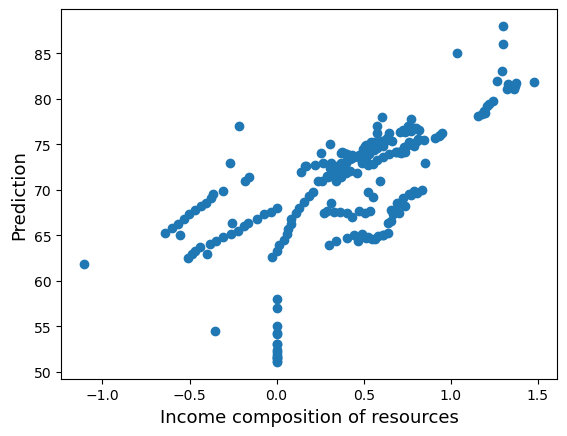

In [32]:
plt.scatter(df_patt['Income composition of resources'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Income composition of resources', fontsize = 13)
plt.show()

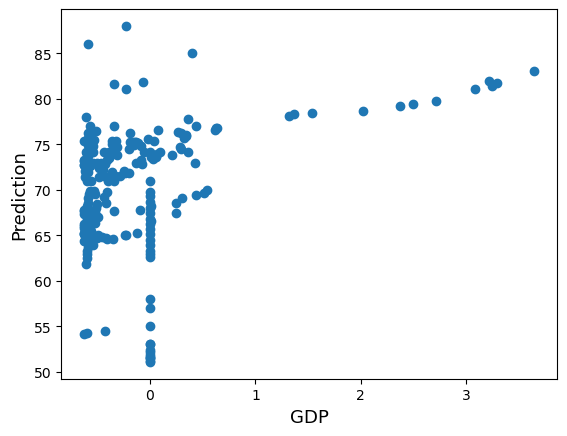

In [33]:
plt.scatter(df_patt['GDP'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('GDP', fontsize = 13)
plt.show()

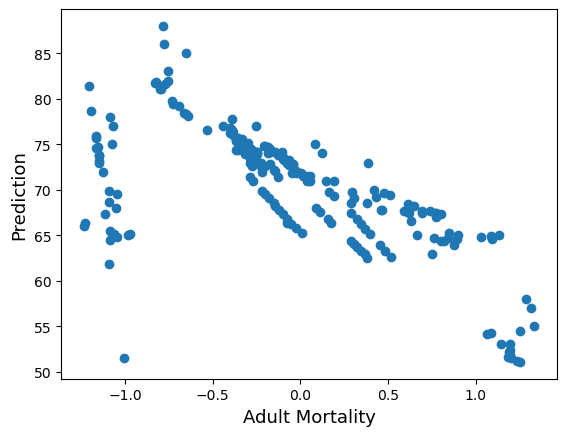

In [34]:
plt.scatter(df_patt['Adult Mortality'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Adult Mortality', fontsize = 13)
plt.show()

### ix. Feature Importance

K-NN does not provide a prediction for feature importance or coefficients.

### x. Explainability

In [35]:
import shap

In [36]:
explainer = shap.KernelExplainer(reg.predict, df_patt[X_train.columns])

Using 225 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [37]:
shap_values = explainer.shap_values(df_patt[X_train.columns])

  0%|          | 0/225 [00:00<?, ?it/s]

In [38]:
df_shap_values = pd.DataFrame(shap_values[0])
df_shap_values.columns = X_train.columns

**Importance Variable**

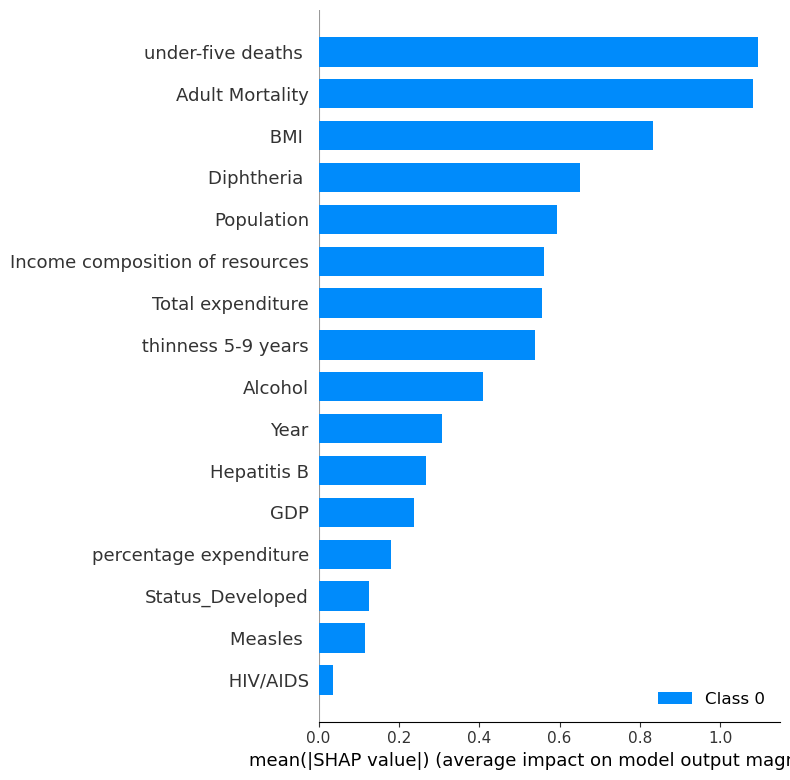

In [39]:
shap.summary_plot(shap_values, df_patt[X_train.columns])

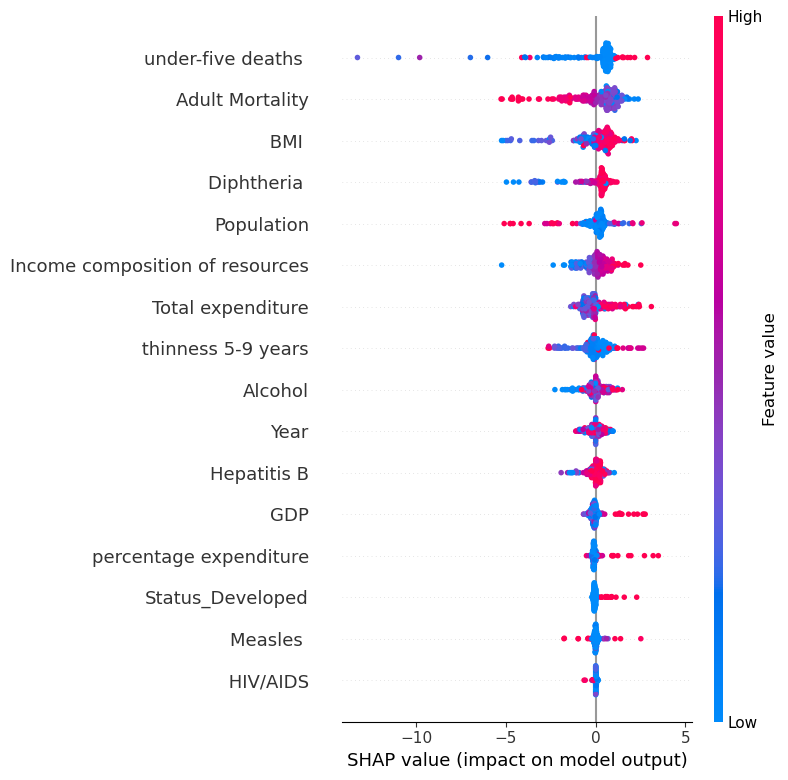

In [40]:
shap.summary_plot(shap_values[0], df_patt[X_train.columns], plot_type = 'dot')

In [41]:
df_shap_values['partial_sum_SHAP'] = df_shap_values.sum(axis = 1)

In [42]:
df_shap_values = df_shap_values[['partial_sum_SHAP']]

In [43]:
df_shap_values['pred_model'] = df_patt['pred']

**Sum of SHAP Values**

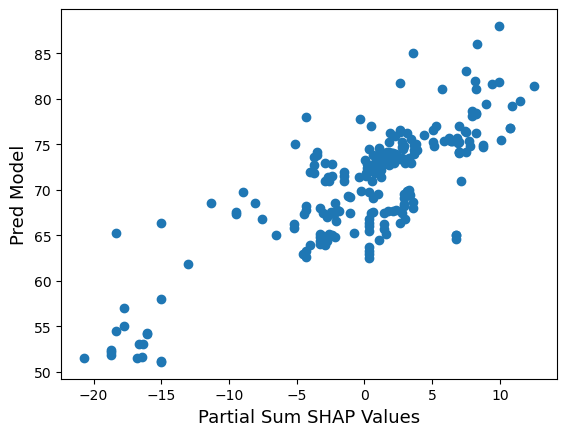

In [44]:
plt.scatter(df_shap_values['partial_sum_SHAP'], df_shap_values['pred_model'])
plt.xlabel('Partial Sum SHAP Values', fontsize = 13)
plt.ylabel('Pred Model', fontsize = 13)
plt.show()

**SHAP dependency**

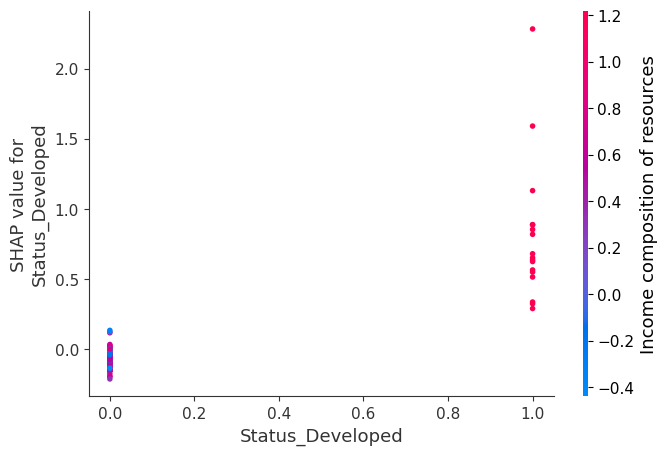

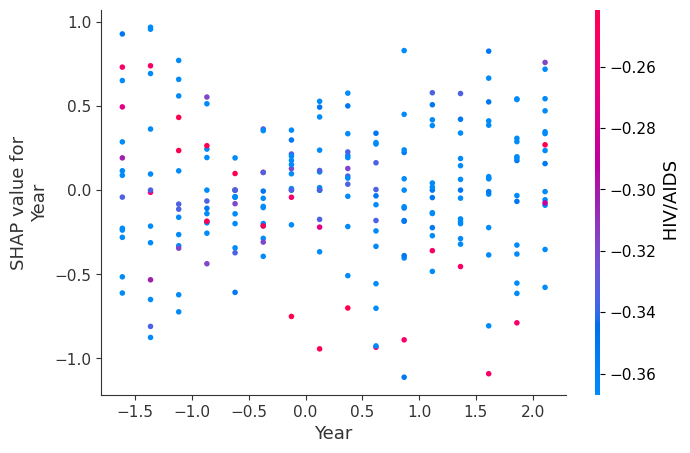

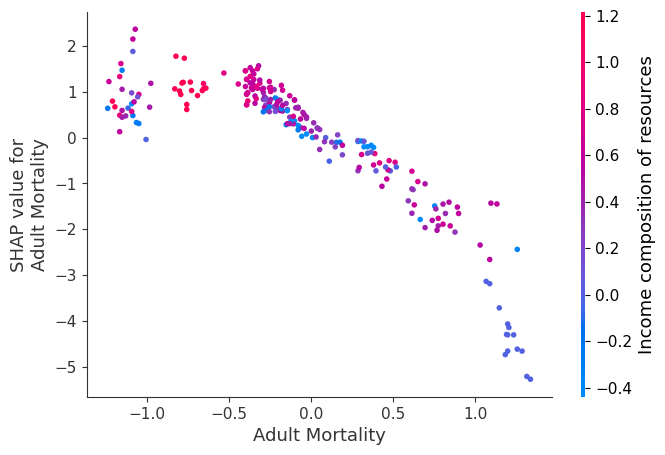

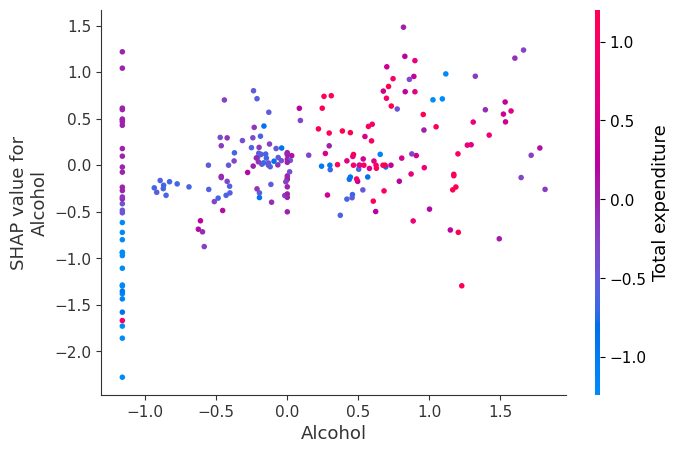

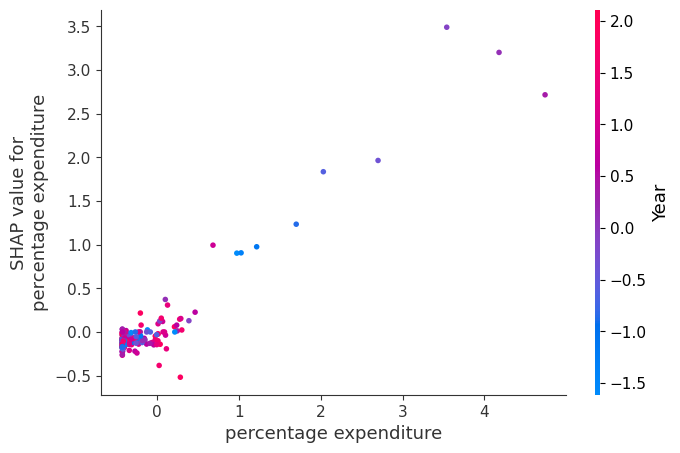

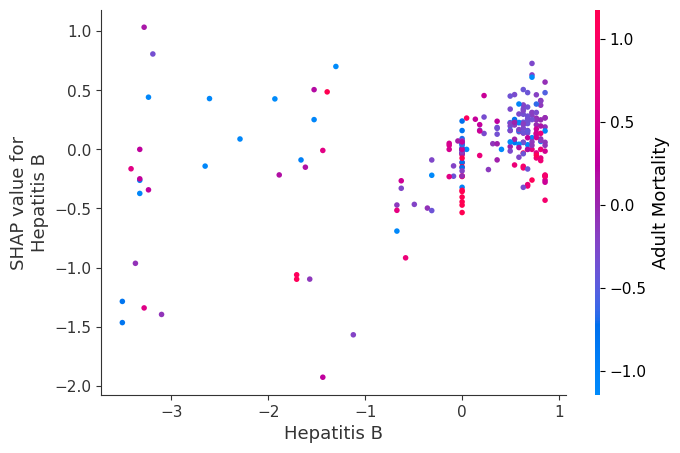

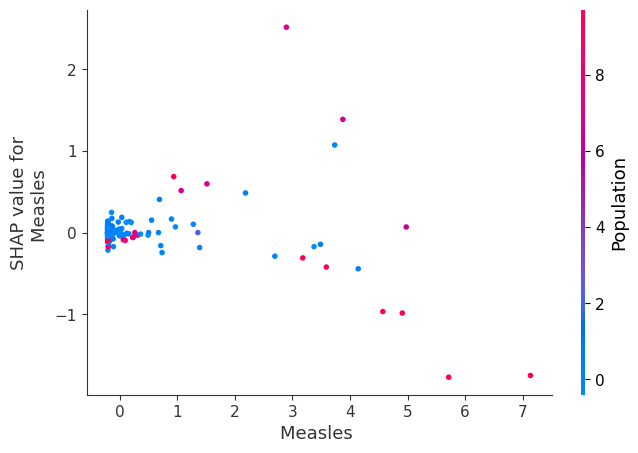

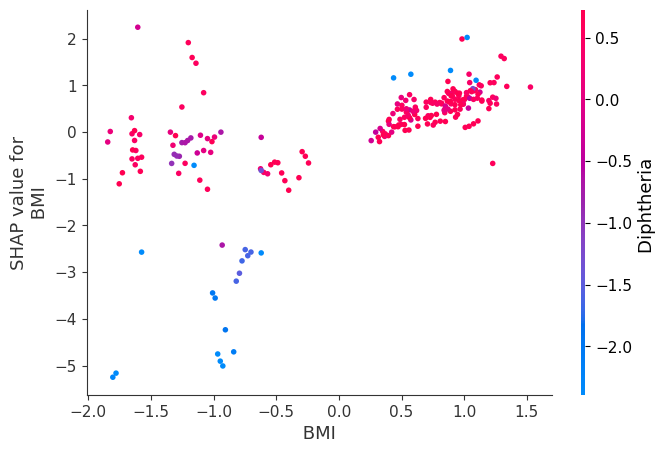

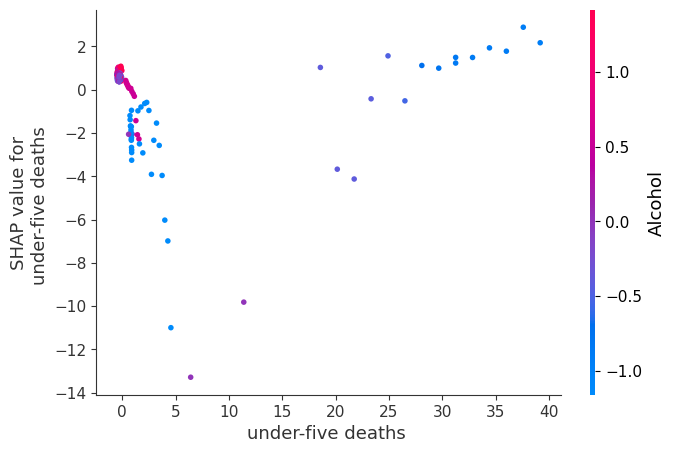

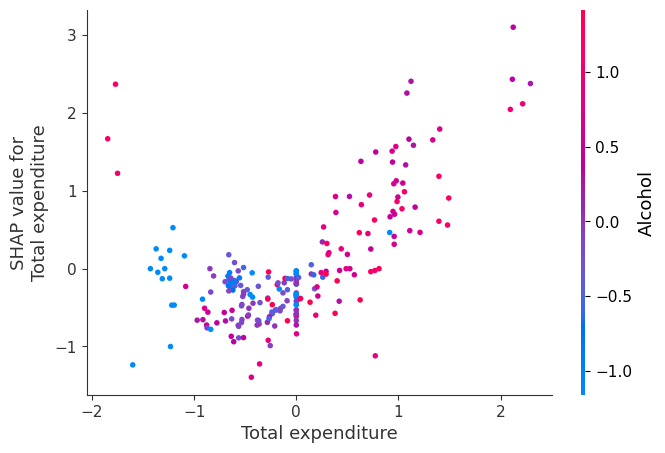

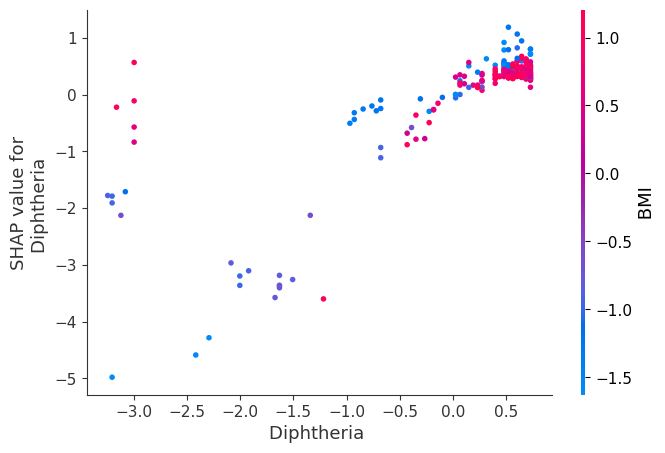

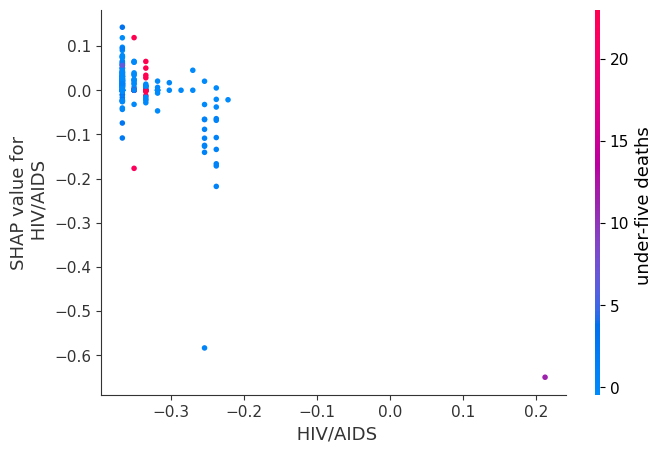

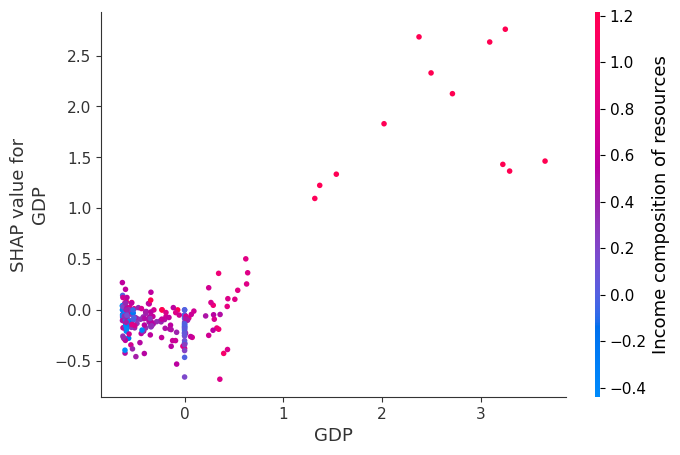

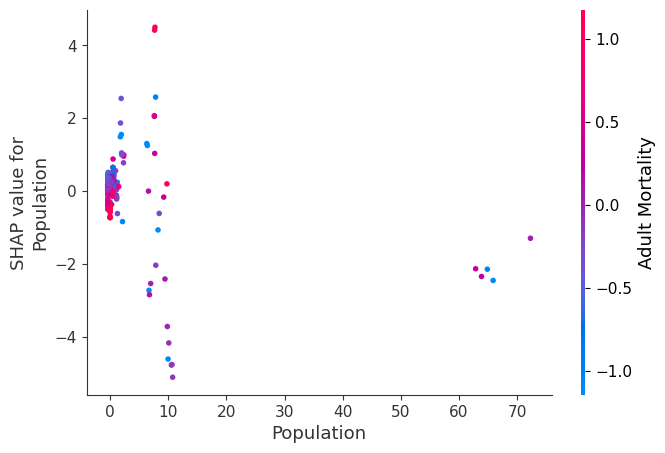

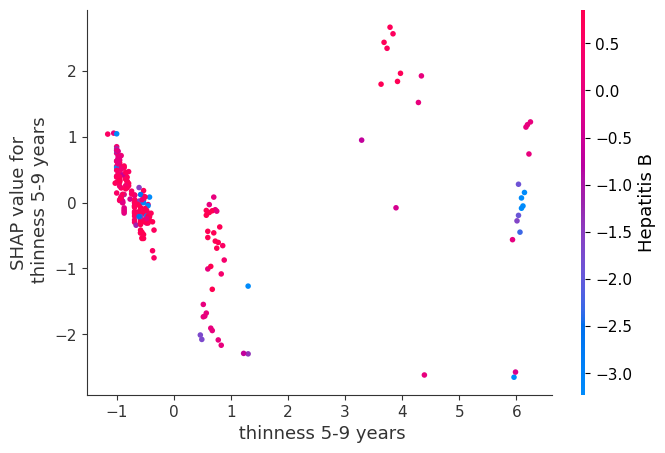

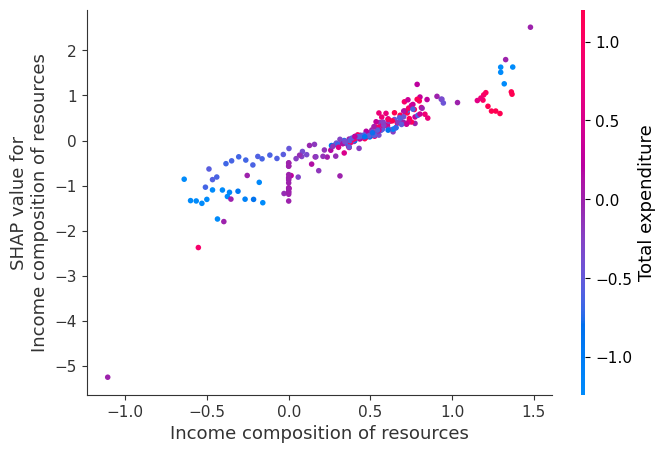

In [45]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values[0], df_patt[X_train.columns])

### Time of execution

In [46]:
end = time.time()

In [47]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 7 minutes and 2 seconds.
